In [15]:
import os
from my_dataset.dataloader import BrainDataModule
from matplotlib import pyplot as plt
from my_lightning_module.segmenter import SegModel, ModelEnum
import numpy as np

In [17]:
for model_enum in ModelEnum:
    print(f"{model_enum.name} {model_enum.value}")

UNET 1
TPR_E_UNET 2
TPR_D_UNET 3
TPR_ED_UNET 4


In [2]:
data_dir = '/media/idham/SpaceX/333_workspace/my_lab/stacked_img_msk_data_dirs.npy'
datamodule = BrainDataModule(data_dir=data_dir, k=1, num_splits=5, split_seed=12345, batch_size=40, num_workers=os.cpu_count())
datamodule.prepare_data()
datamodule.setup()

img, msk = next(iter(datamodule.val_dataloader()))

In [13]:
path = '/media/idham/SpaceX/333_workspace/my_lab/lightning_logs/version_6/checkpoints/TPR_D_UNET-epoch=27-val_loss=0.10.ckpt'
model = SegModel.load_from_checkpoint(checkpoint_path=path)

print(model.hparams.lr)

0.001


Text(0.5, 1.0, 'prediction')

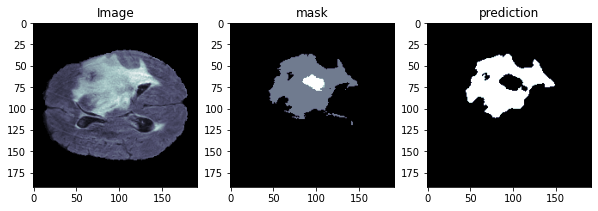

In [8]:
model.eval()
pred = model(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,20))
ax[0].imshow(img[6,0,...], cmap='bone')
ax[0].set_title("Image")
ax[1].imshow(msk.argmax(dim=1)[6,...], cmap='bone')
ax[1].set_title("mask")
ax[2].imshow(pred.argmax(dim=1)[6,...], cmap='bone')
ax[2].set_title("prediction")

Text(0.5, 1.0, 'prediction')

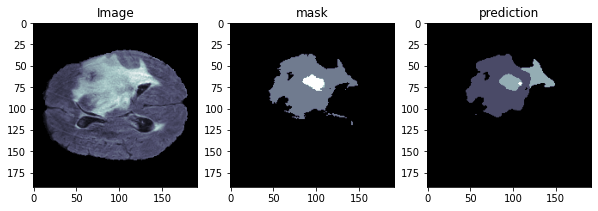

In [12]:
model.eval()
pred = model(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,20))
ax[0].imshow(img[6,0,...], cmap='bone')
ax[0].set_title("Image")
ax[1].imshow(msk.argmax(dim=1)[6,...], cmap='bone')
ax[1].set_title("mask")
ax[2].imshow(pred.argmax(dim=1)[6,...], cmap='bone')
ax[2].set_title("prediction")

Text(0.5, 1.0, 'prediction')

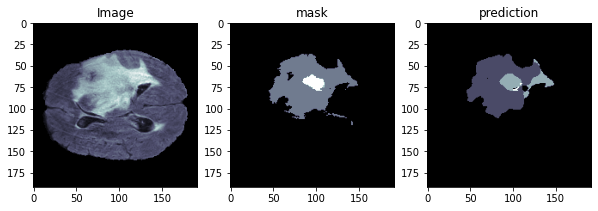

In [14]:
model.eval()
pred = model(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,20))
ax[0].imshow(img[6,0,...], cmap='bone')
ax[0].set_title("Image")
ax[1].imshow(msk.argmax(dim=1)[6,...], cmap='bone')
ax[1].set_title("mask")
ax[2].imshow(pred.argmax(dim=1)[6,...], cmap='bone')
ax[2].set_title("prediction")

Text(0.5, 1.0, 'prediction')

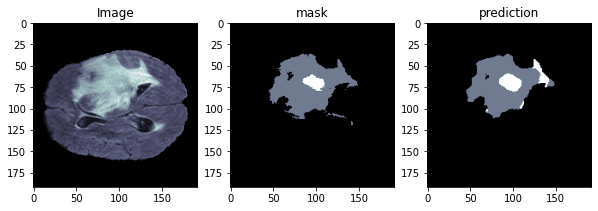

In [10]:
model.eval()
pred = model(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,20))
ax[0].imshow(img[6,0,...], cmap='bone')
ax[0].set_title("Image")
ax[1].imshow(msk.argmax(dim=1)[6,...], cmap='bone')
ax[1].set_title("mask")
ax[2].imshow(pred.argmax(dim=1)[6,...], cmap='bone')
ax[2].set_title("prediction")

In [18]:
unet_metrics = np.load('metric_collection_5_fold_k_1_UNET.npy', allow_pickle=True)
d_unet_metrics = np.load('metric_collection_5_fold_k_1_TPR_E_UNET.npy', allow_pickle=True)
e_unet_metrics = np.load('metric_collection_5_fold_k_1_TPR_D_UNET.npy', allow_pickle=True)
ed_unet_metrics = np.load('metric_collection_5_fold_k_1_TPR_ED_UNET.npy', allow_pickle=True)

In [24]:
print(unet_metrics[30])
print(d_unet_metrics[30])
print(e_unet_metrics[30])
print(ed_unet_metrics[30])

{'val_loss': tensor(0.0940, device='cuda:0'), 'loss_IoU_val': tensor(0.1590, device='cuda:0'), 'loss_Focal_val': tensor(0.4471, device='cuda:0')}
{'val_loss': tensor(0.0892, device='cuda:0'), 'loss_IoU_val': tensor(0.1517, device='cuda:0'), 'loss_Focal_val': tensor(0.4471, device='cuda:0')}
{'val_loss': tensor(0.0936, device='cuda:0'), 'loss_IoU_val': tensor(0.1575, device='cuda:0'), 'loss_Focal_val': tensor(0.4471, device='cuda:0')}
{'val_loss': tensor(0.0952, device='cuda:0'), 'loss_IoU_val': tensor(0.1608, device='cuda:0'), 'loss_Focal_val': tensor(0.4472, device='cuda:0')}


In [27]:
print(np.load('score_5_fold_UNET.npy', allow_pickle=True))
print(np.load('score_5_fold_TPR_E_UNET.npy', allow_pickle=True))
print(np.load('score_5_fold_TPR_D_UNET.npy', allow_pickle=True))
print(np.load('score_5_fold_TPR_ED_UNET.npy', allow_pickle=True))

90.58
91.08
90.64
90.48
